# Gradient Leakage Attacks in Differential Privacy Learning

In [1]:
import numpy as np
from utils import load_data
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science') # For "publication-like" plots

# Load data
train_images, train_labels = load_data('train', shuffle = True)
test_images, test_labels = load_data('test', shuffle = False)

## Class Distribution Plot

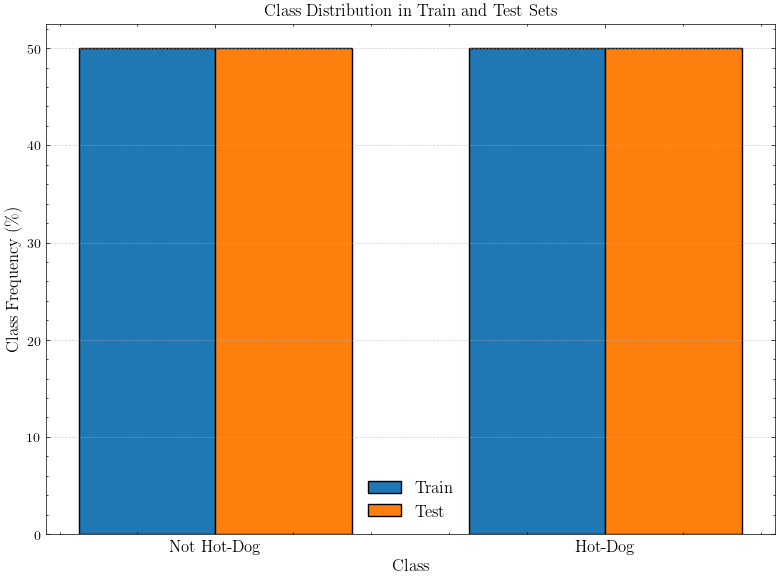

In [2]:
# Calculate class distributions
train_labels, test_labels = train_labels.int(), test_labels.int()
train_class_dist = train_labels.bincount() / len(train_labels) * 100
test_class_dist = test_labels.bincount() / len(test_labels) * 100

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = np.arange(2)
ax.bar(x - bar_width / 2, train_class_dist, bar_width, label='Train', color='tab:blue', edgecolor='black')
ax.bar(x + bar_width / 2, test_class_dist, bar_width, label='Test', color='tab:orange', edgecolor='black')

# Add labels, title, and legend
ax.set_xlabel('Class', fontsize = 12)
ax.set_ylabel('Class Frequency (\\%)', fontsize = 12)
ax.set_title('Class Distribution in Train and Test Sets', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(['Not Hot-Dog', 'Hot-Dog'], fontsize = 12)
ax.legend(fontsize = 12)
ax.grid(axis='y', linestyle='--', alpha = 0.6)

# Show (and save) the plot
plt.savefig('static/class_distribution.pdf', bbox_inches = 'tight', dpi = 300)
plt.tight_layout()
plt.show()

## Some Example Images...

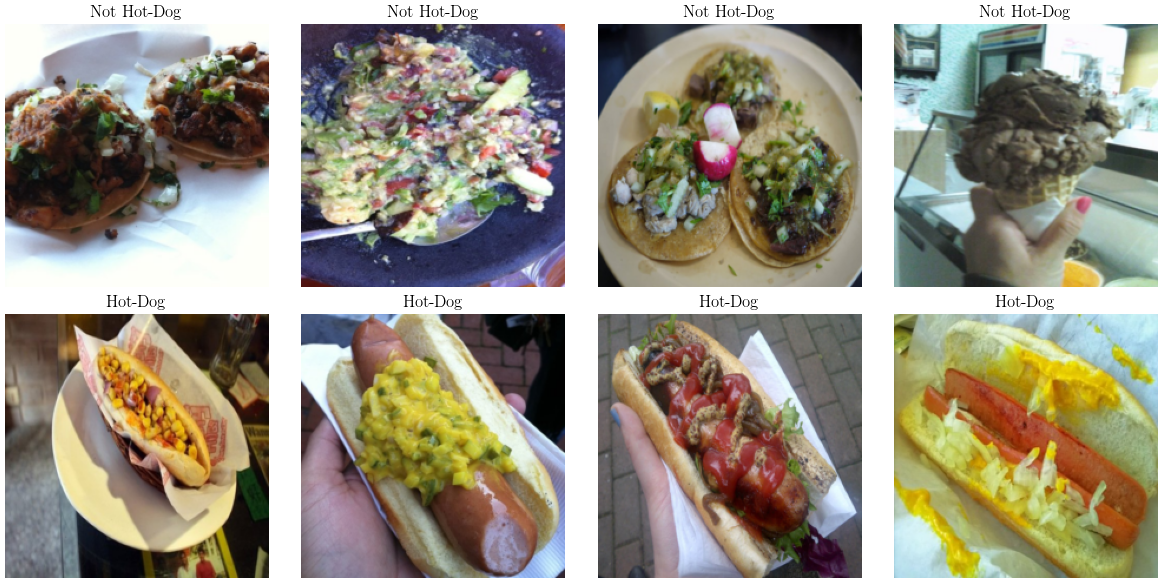

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

class_0_indices = (train_labels == 0).nonzero(as_tuple=True)[0][:4]
class_1_indices = (train_labels == 1).nonzero(as_tuple=True)[0][:4]

# Plot examples for class 0
for i, idx in enumerate(class_0_indices):
    ax = axes[0, i]
    ax.imshow(train_images[idx].permute(1, 2, 0).numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title("Not Hot-Dog")

# Plot examples for class 1
for i, idx in enumerate(class_1_indices):
    ax = axes[1, i]
    ax.imshow(train_images[idx].permute(1, 2, 0).numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title("Hot-Dog")

plt.savefig('static/class_examples.pdf', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

## Visualize Reconstruction Evolution

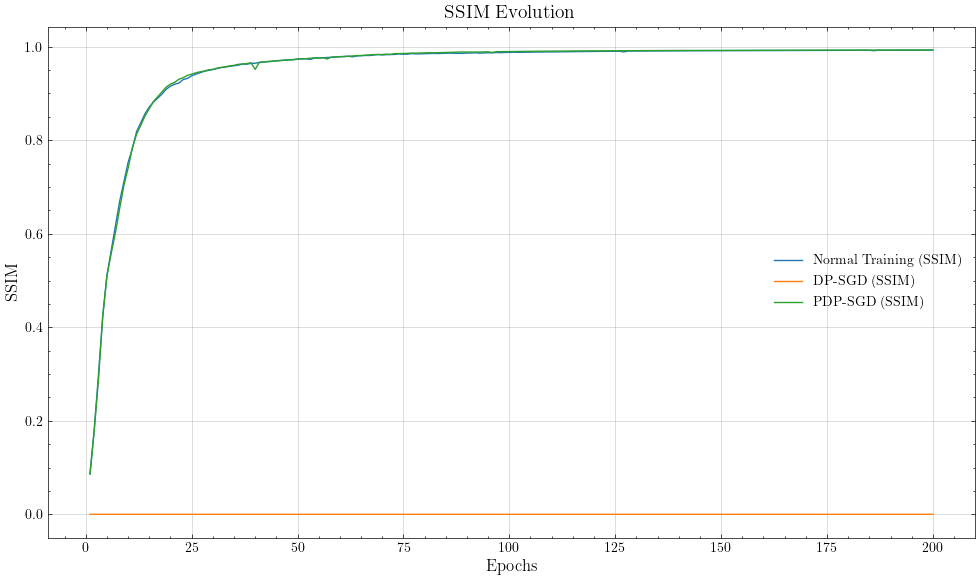

In [31]:
import numpy as np
from utils import load_data
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science') # For "publication-like" plots

# Load reconstruction histories
normal_training = pd.read_csv('static/leakage_attack_normal.csv')
dp_sgd_training = pd.read_csv('static/leakage_attack_DP_SGD.csv')
pdp_sgd_training = pd.read_csv('static/leakage_attack_PDP_SGD.csv')

# Extract SSIM and loss values
epochs = np.arange(1, len(normal_training['SSIM']) + 1)
ssim_normal = normal_training['SSIM']
loss_normal = normal_training['Loss']
ssim_dp_sgd = dp_sgd_training['SSIM']
loss_dp_sgd = dp_sgd_training['Loss']
ssim_pdp_sgd = pdp_sgd_training['SSIM']
loss_pdp_sgd = pdp_sgd_training['Loss']

# Plot SSIM evolution
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, ssim_normal, label='Normal Training (SSIM)', color='tab:blue')
ax.plot(epochs, ssim_dp_sgd, label='DP-SGD (SSIM)', color='tab:orange')
ax.plot(epochs, ssim_pdp_sgd, label='PDP-SGD (SSIM)', color='tab:green')
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('SSIM', fontsize=12)
ax.set_title('SSIM Evolution', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.6)
plt.tight_layout()
plt.savefig('static/SSIM_Evolution.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

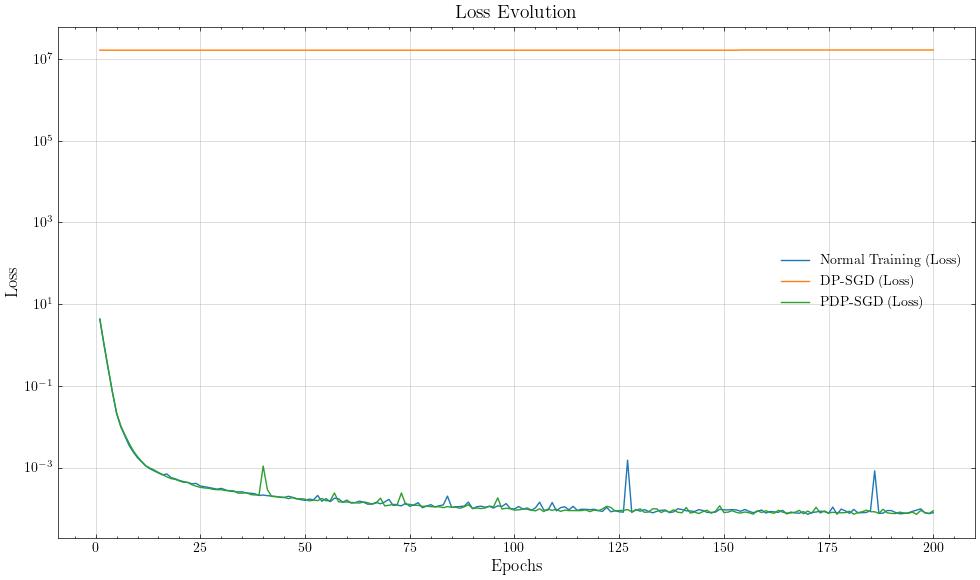

In [32]:
# Plot Loss evolution
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, loss_normal, label='Normal Training (Loss)', color='tab:blue')
ax.plot(epochs, loss_dp_sgd, label='DP-SGD (Loss)', color='tab:orange')
ax.plot(epochs, loss_pdp_sgd, label='PDP-SGD (Loss)', color='tab:green')
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss Evolution', fontsize=14)
ax.set_yscale('log')
ax.legend(fontsize=10)
ax.grid(alpha=0.6)
plt.tight_layout()
plt.savefig('static/Loss_Evolution.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

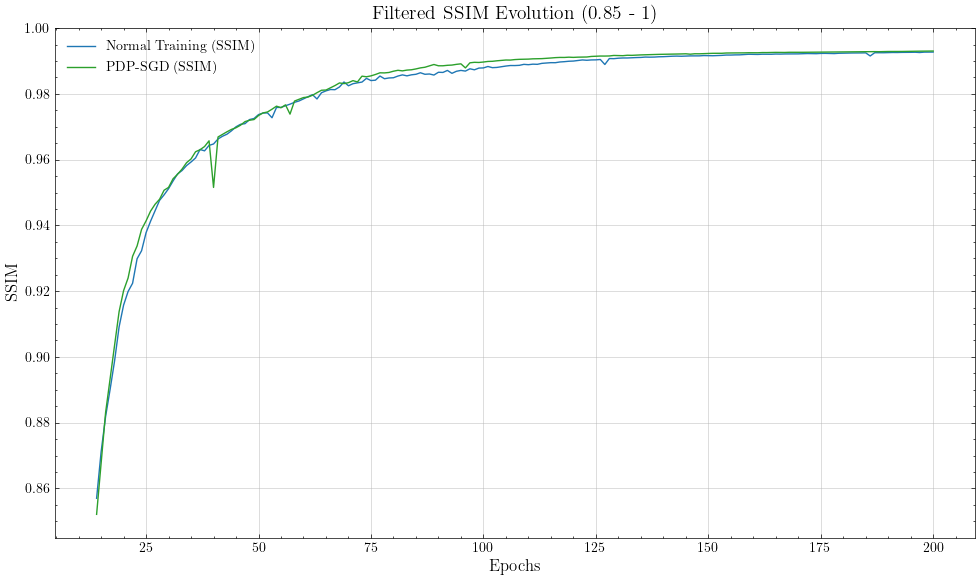

In [33]:
# Filter SSIM values between 0.85 and 1
filtered_epochs = epochs[(ssim_normal >= 0.85) & (ssim_normal <= 1)]
filtered_ssim_normal = ssim_normal[(ssim_normal >= 0.85) & (ssim_normal <= 1)]
filtered_ssim_dp_sgd = ssim_dp_sgd[(ssim_dp_sgd >= 0.85) & (ssim_dp_sgd <= 1)]
filtered_ssim_pdp_sgd = ssim_pdp_sgd[(ssim_pdp_sgd >= 0.85) & (ssim_pdp_sgd <= 1)]

# Plot filtered SSIM evolution
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(filtered_epochs, filtered_ssim_normal, label='Normal Training (SSIM)', color='tab:blue')
ax.plot(filtered_epochs, filtered_ssim_pdp_sgd, label='PDP-SGD (SSIM)', color='tab:green')
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('SSIM', fontsize=12)
ax.set_title('Filtered SSIM Evolution (0.85 - 1)', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.6)

plt.tight_layout()
plt.savefig('static/SSIM_Evolution_Filtered.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()